In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fashion_minst = keras.datasets.fashion_mnist
(xtf, ytf), (xte, yte) = fashion_minst.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
xtf.shape

(60000, 28, 28)

In [4]:
ytf.shape

(60000,)

In [5]:
xt, xv = xtf[:int(xtf.shape[0] * .80)] / 255.0, xtf[int(xtf.shape[0] * .80):] / 255.0
yt, yv = ytf[:int(ytf.shape[0] * .80)] , ytf[int(ytf.shape[0] * .80):]

In [6]:
xv.shape

(12000, 28, 28)

In [7]:
xt.shape

(48000, 28, 28)

In [8]:
yv.shape

(12000,)

In [9]:
yt.shape

(48000,)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
yt[0]

9

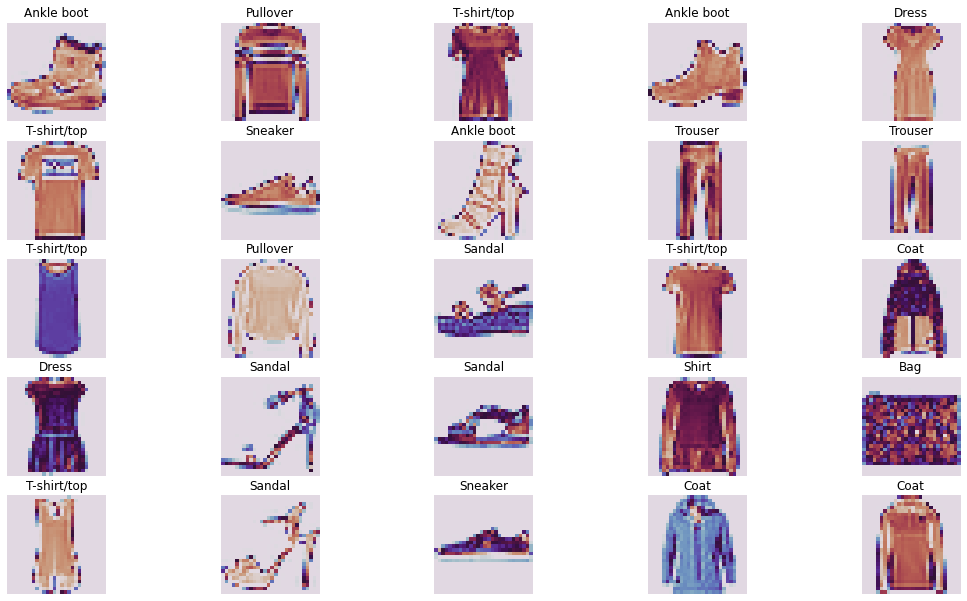

In [12]:
fig, axs = plt.subplots(5,5)
fig.set_size_inches(18.5, 10.5)

col = 0
for i in range(25):
    axs[i%5,col].imshow(
        xt[i], cmap='twilight', interpolation='nearest'
    )
    axs[i%5,col].set_axis_off()
    axs[i%5,col].set_title(class_names[yt[i]], color='black')
    if i % 5 == 4:
        col += 1

plt.show()

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

2022-11-27 22:42:00.722605: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-27 22:42:00.889467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-27 22:42:00.890255: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-27 22:42:00.891965: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]
w, b = hidden1.get_weights()

In [16]:
w

array([[ 0.04586433, -0.06139747,  0.03486624, ..., -0.03830197,
        -0.0063915 , -0.03418216],
       [ 0.06984809,  0.06752008, -0.0228071 , ..., -0.05093896,
         0.00343452,  0.04062643],
       [ 0.0555914 ,  0.06685388, -0.0002095 , ...,  0.02794203,
        -0.05940769, -0.01808087],
       ...,
       [-0.04626671,  0.06037776,  0.01784675, ...,  0.05411202,
        -0.04365536,  0.00992353],
       [ 0.02934746,  0.03285627,  0.01819327, ..., -0.01111095,
        -0.02267774,  0.00821958],
       [ 0.01983488,  0.04733864,  0.04061555, ...,  0.01943939,
         0.03650365,  0.00521083]], dtype=float32)

In [17]:
w.shape

(784, 300)

In [18]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
b.shape

(300,)

# θ(XW + b)
>     θ = activation function
>     X = feature
>     W = weights between neuron layers
>     b = weights of bias neuron and next layer
    
*this is for a single layer perceptrion*

In [20]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = keras.optimizers.SGD(learning_rate=0.01),
    metrics = ['accuracy']
)

In [21]:
history = model.fit(xt, yt, epochs=30, validation_data=(xv,yv))

2022-11-27 22:42:04.040281: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7514 - accuracy: 0.7534 - val_loss: 0.5328 - val_accuracy: 0.8180
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5003 - accuracy: 0.8276 - val_loss: 0.4719 - val_accuracy: 0.8317
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4537 - accuracy: 0.8429 - val_loss: 0.4458 - val_accuracy: 0.8424
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4247 - accuracy: 0.8526 - val_loss: 0.4235 - val_accuracy: 0.8503
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4054 - accuracy: 0.8590 - val_loss: 0.4197 - val_accuracy: 0.8540
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3881 - accuracy: 0.8644 - val_loss: 0.4090 - val_accuracy: 0.8563
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3749 - accuracy: 0.8692 - val_loss: 0.3842 - val_accuracy:

In [22]:
history.history

{'loss': [0.7514260411262512,
  0.500308096408844,
  0.4537058472633362,
  0.424722284078598,
  0.4054470360279083,
  0.38814520835876465,
  0.3748503029346466,
  0.36294353008270264,
  0.3516865670681,
  0.3436141312122345,
  0.3339466452598572,
  0.32625332474708557,
  0.31836897134780884,
  0.3113841414451599,
  0.30549660325050354,
  0.29998624324798584,
  0.29346761107444763,
  0.28757116198539734,
  0.2821364402770996,
  0.27752503752708435,
  0.27138862013816833,
  0.2672775983810425,
  0.263645738363266,
  0.2585643529891968,
  0.2539233863353729,
  0.24881668388843536,
  0.24661488831043243,
  0.24152687191963196,
  0.23806579411029816,
  0.23367497324943542],
 'accuracy': [0.7534166574478149,
  0.8276249766349792,
  0.8428958058357239,
  0.8526458144187927,
  0.8589583039283752,
  0.8643749952316284,
  0.8691666722297668,
  0.8733124732971191,
  0.8765000104904175,
  0.8776041865348816,
  0.8796250224113464,
  0.8833125233650208,
  0.8854583501815796,
  0.8881875276565552,
  

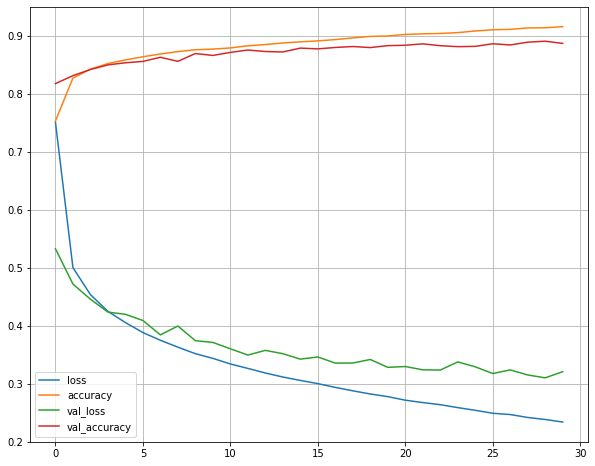

In [23]:
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.show()

In [24]:
model.evaluate(xte, yte)

313/313 [==============================] - 1s 3ms/step - loss: 78.2764 - accuracy: 0.8335


[78.27642822265625, 0.8335000276565552]

In [25]:
yprob = model.predict(xte)
yprob[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [26]:
for k in yprob[:10]:
    print(class_names[k.tolist().index(1)])

Ankle boot
Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Shirt
Sandal
Sneaker


In [27]:
for k in yte[:10]:
    print(class_names[k])

Ankle boot
Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Shirt
Sandal
Sneaker


In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
housing = fetch_california_housing()

xtf, xte, ytf, yte = train_test_split(housing.data, housing.target)
xt, xv, yt, yv = train_test_split(xtf, ytf)

In [30]:
xt[0]

array([   2.8269    ,   34.        ,    4.28526646,    1.03134796,
        796.        ,    2.49529781,   35.5       , -119.27      ])

In [31]:
xt.shape

(11610, 8)

In [32]:
scaler = StandardScaler()
xt = scaler.fit_transform(xt)
xv = scaler.fit_transform(xv)
xte = scaler.fit_transform(xte)

In [33]:
xta, xtb = xt[:, :5], xt[:, 2:]
xva, xvb = xv[:, :5], xv[:, 2:]
xtea, xteb = xte[:, :5], xte[:, 2:]

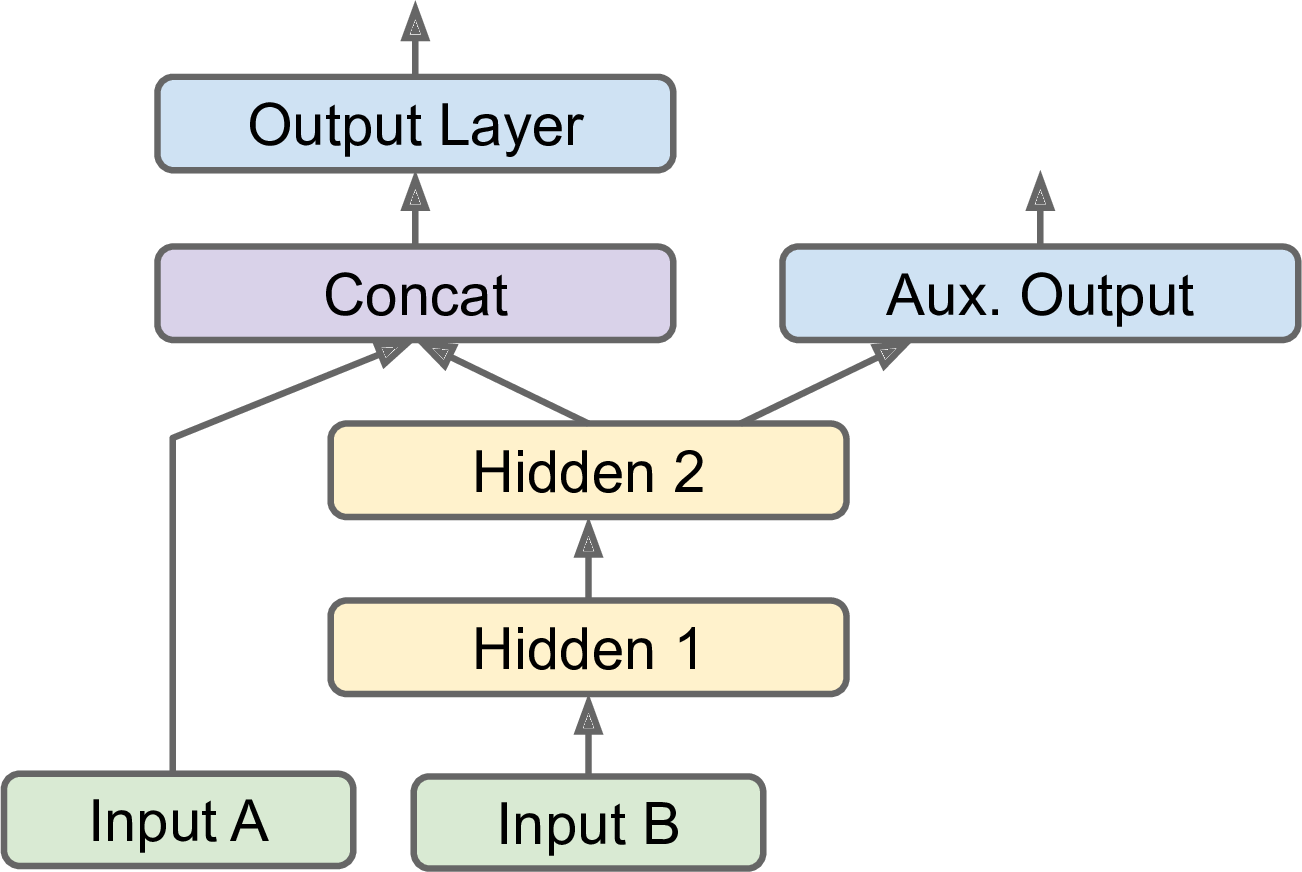

> Keras allows for functional API.

> Below is the above network built.

> Multi inputs can have simple patterns go directly to the end (allowing it to not be washed out). Multi outputs allow you to gain insight and output multiple different things (regression and classification regarding two serparet need for example).

In [34]:
input_a = keras.layers.Input(shape=[5], name='wide_in')
input_b = keras.layers.Input(shape=[6], name='deep_in')
hidden1 = keras.layers.Dense(30, activation='relu')(input_b)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_a, hidden2])
output = keras.layers.Dense(1, name='main_out')(concat)
aux_output = keras.layers.Dense(1, name='aux_out')(hidden2)
model2 = keras.Model(inputs=[input_a, input_b], outputs=[output, aux_output])

In [35]:
model2.compile(
    loss=['mse', 'mse'], 
    loss_weights=[0.9, 0.1], 
    optimizer = keras.optimizers.SGD(learning_rate=0.01)
)

In [36]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_in (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           210         deep_in[0][0]                    
__________________________________________________________________________________________________
wide_in (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
______________________________________________________________________________________________

In [37]:
history = model2.fit(
    [xta, xtb], [yt, yt], epochs=50,
    validation_data=([xva, xvb], [yv, yv])
)

Epoch 1/50
363/363 [==============================] - 2s 4ms/step - loss: 0.9885 - main_out_loss: 0.8476 - aux_out_loss: 2.2563 - val_loss: 0.6277 - val_main_out_loss: 0.5595 - val_aux_out_loss: 1.2416
Epoch 2/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5572 - main_out_loss: 0.4916 - aux_out_loss: 1.1478 - val_loss: 0.6341 - val_main_out_loss: 0.5870 - val_aux_out_loss: 1.0579
Epoch 3/50
363/363 [==============================] - 1s 3ms/step - loss: 0.5145 - main_out_loss: 0.4640 - aux_out_loss: 0.9693 - val_loss: 0.5275 - val_main_out_loss: 0.4825 - val_aux_out_loss: 0.9320
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4825 - main_out_loss: 0.4421 - aux_out_loss: 0.8462 - val_loss: 0.5081 - val_main_out_loss: 0.4709 - val_aux_out_loss: 0.8426
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4581 - main_out_loss: 0.4247 - aux_out_loss: 0.7585 - val_loss: 0.4938 - val_main_out_loss: 0.4622 - val_aux_out_los

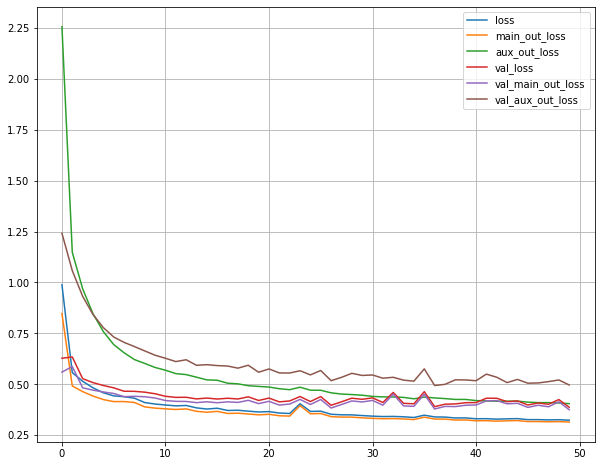

In [38]:
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.show()

In [39]:
tl, ml, al = model2.evaluate([xtea, xteb], [yte, yte])

162/162 [==============================] - 0s 2ms/step - loss: 0.5704 - main_out_loss: 0.5633 - aux_out_loss: 0.6341


In [40]:
ypredm, ypreda = model2.predict([xtea[:10], xteb[:10]])

In [41]:
ypredm

array([[3.8806806],
       [3.2904668],
       [1.0178803],
       [1.802533 ],
       [1.6743295],
       [4.254281 ],
       [2.5366611],
       [2.029603 ],
       [1.674165 ],
       [2.0827413]], dtype=float32)

In [42]:
ypreda

array([[3.9529755],
       [3.5948596],
       [1.0516202],
       [2.1302702],
       [2.224625 ],
       [4.131661 ],
       [2.255754 ],
       [2.545103 ],
       [1.502271 ],
       [2.271135 ]], dtype=float32)

In [43]:
yte[:10]

array([1.761  , 4.283  , 0.953  , 0.831  , 1.653  , 5.00001, 2.219  ,
       1.917  , 1.666  , 2.164  ])

# Subclassing API

In [44]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_out = keras.layers.Dense(1)
        self.aux_out = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_a, input_b = inputs
        hidden1 = self.hidden1(input_b)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_a, hidden2])
        main_out = self.main_out(concat)
        aux_out = self.aux_out(hidden2)
        return main_out, aux_out
    
model3 = WideAndDeepModel()

In [45]:
model3.call([input_a, input_b])

(<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_7')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_8')>)

In [46]:
model3.compile(
    loss=['mse', 'mse'],
    loss_weights=[0.9, 0.1],
    optimizer=keras.optimizers.SGD(learning_rate=5e-3),
    metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mean_absolute_percentage_error']
)

In [47]:
history = model3.fit(
    [xta, xtb], [yt, yt], epochs=50,
    validation_data=([xva, xvb], [yv, yv])
)

Epoch 1/50
363/363 [==============================] - 2s 5ms/step - loss: 1.2011 - output_1_loss: 1.1043 - output_2_loss: 2.0726 - output_1_root_mean_squared_error: 1.0509 - output_1_mean_absolute_percentage_error: 42.9209 - output_2_root_mean_squared_error: 1.4397 - output_2_mean_absolute_percentage_error: 50.0961 - val_loss: 0.6872 - val_output_1_loss: 0.6258 - val_output_2_loss: 1.2405 - val_output_1_root_mean_squared_error: 0.7911 - val_output_1_mean_absolute_percentage_error: 33.9841 - val_output_2_root_mean_squared_error: 1.1138 - val_output_2_mean_absolute_percentage_error: 48.0345
Epoch 2/50
363/363 [==============================] - 1s 4ms/step - loss: 0.6352 - output_1_loss: 0.5781 - output_2_loss: 1.1497 - output_1_root_mean_squared_error: 0.7603 - output_1_mean_absolute_percentage_error: 32.9373 - output_2_root_mean_squared_error: 1.0723 - output_2_mean_absolute_percentage_error: 49.3667 - val_loss: 0.6094 - val_output_1_loss: 0.5588 - val_output_2_loss: 1.0647 - val_output

In [48]:
tl = model3.evaluate([xtea, xteb], [yte, yte])

162/162 [==============================] - 0s 3ms/step - loss: 0.4915 - output_1_loss: 0.4789 - output_2_loss: 0.6042 - output_1_root_mean_squared_error: 0.6920 - output_1_mean_absolute_percentage_error: 30.0084 - output_2_root_mean_squared_error: 0.7773 - output_2_mean_absolute_percentage_error: 35.8338


# Saving and Loading a Model

In [49]:
model2.save('mykerasmodel.h5')

In [50]:
model2 = keras.models.load_model('mykerasmodel.h5')

In [51]:
# saves model at end of each epoch
checkpoint_cb = keras.callbacks.ModelCheckpoint('mykerasmodel.h5')
history = model2.fit(
    [xta, xtb], [yt, yt], epochs=10,
    validation_data=([xva, xvb], [yv, yv]),
    callbacks=[checkpoint_cb]
)

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3220 - main_out_loss: 0.3128 - aux_out_loss: 0.4045 - val_loss: 0.3933 - val_main_out_loss: 0.3820 - val_aux_out_loss: 0.4950
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3226 - main_out_loss: 0.3135 - aux_out_loss: 0.4041 - val_loss: 0.3880 - val_main_out_loss: 0.3764 - val_aux_out_loss: 0.4926
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3204 - main_out_loss: 0.3114 - aux_out_loss: 0.4011 - val_loss: 0.3922 - val_main_out_loss: 0.3819 - val_aux_out_loss: 0.4848
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3224 - main_out_loss: 0.3134 - aux_out_loss: 0.4034 - val_loss: 0.4455 - val_main_out_loss: 0.4348 - val_aux_out_loss: 0.5424
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3197 - main_out_loss: 0.3108 - aux_out_loss: 0.4002 - val_loss: 0.3864 - val_main_out_loss: 0.3748 - val_aux_out_los

In [52]:
# saves the best on validation
checkpoint_cb = keras.callbacks.ModelCheckpoint('mykerasmodel.h5', save_best_only=True)
history = model2.fit(
    [xta, xtb], [yt, yt], epochs=10,
    validation_data=([xva, xvb], [yv, yv]),
    callbacks=[checkpoint_cb]
)
model2 = keras.models.load_model('mykerasmodel.h5')

Epoch 1/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3232 - main_out_loss: 0.3151 - aux_out_loss: 0.3964 - val_loss: 0.3992 - val_main_out_loss: 0.3881 - val_aux_out_loss: 0.4991
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3189 - main_out_loss: 0.3104 - aux_out_loss: 0.3947 - val_loss: 0.4011 - val_main_out_loss: 0.3905 - val_aux_out_loss: 0.4971
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3171 - main_out_loss: 0.3087 - aux_out_loss: 0.3924 - val_loss: 0.3672 - val_main_out_loss: 0.3563 - val_aux_out_loss: 0.4651
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3141 - main_out_loss: 0.3056 - aux_out_loss: 0.3903 - val_loss: 0.4165 - val_main_out_loss: 0.4063 - val_aux_out_loss: 0.5085
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3143 - main_out_loss: 0.3058 - aux_out_loss: 0.3902 - val_loss: 0.3753 - val_main_out_loss: 0.3655 - val_aux_out_los

In [53]:
# stops early
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model2.fit(
    [xta, xtb], [yt, yt], epochs=10,
    validation_data=([xva, xvb], [yv, yv]),
    callbacks=[early_stopping_cb]
)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 0.3151 - main_out_loss: 0.3067 - aux_out_loss: 0.3907 - val_loss: 0.4163 - val_main_out_loss: 0.4070 - val_aux_out_loss: 0.5007
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3145 - main_out_loss: 0.3062 - aux_out_loss: 0.3885 - val_loss: 0.4019 - val_main_out_loss: 0.3921 - val_aux_out_loss: 0.4904
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3155 - main_out_loss: 0.3072 - aux_out_loss: 0.3896 - val_loss: 0.4172 - val_main_out_loss: 0.4067 - val_aux_out_loss: 0.5123
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3128 - main_out_loss: 0.3045 - aux_out_loss: 0.3876 - val_loss: 0.3918 - val_main_out_loss: 0.3814 - val_aux_out_loss: 0.4858
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3138 - main_out_loss: 0.3056 - aux_out_loss: 0.3870 - val_loss: 0.4187 - val_main_out_loss: 0.4095 - val_aux_out_los

# Custom Callbacks

In [54]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("train: {:.2f}".format(logs['val_loss'] / logs['loss']))

# TensorBoard
> define a root directory to store live binary log even files

> use os to create dir

> use function to define different subdir based on date/time

In [55]:
import os 
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d_%H-%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [56]:
(xtf, ytf), (xte, yte) = fashion_minst.load_data()
xt, xv = xtf[:int(xtf.shape[0] * .80)] / 255.0, xtf[int(xtf.shape[0] * .80):] / 255.0
yt, yv = ytf[:int(ytf.shape[0] * .80)] , ytf[int(ytf.shape[0] * .80):]

> create a tensorboard callback and it will write to the log dir

In [57]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(xt, yt, epochs=30, validation_data=(xv,yv), callbacks=[tensorboard_cb])

2022-11-27 22:47:34.145831: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-27 22:47:34.145872: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-27 22:47:34.147829: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-11-27 22:47:34.488197: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-27 22:47:34.488398: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Epoch 1/30
   1/1500 [..............................] - ETA: 8s - loss: 0.3125 - accuracy: 0.8750

2022-11-27 22:47:35.087739: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-27 22:47:35.087779: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


   3/1500 [..............................] - ETA: 5:56 - loss: 0.2329 - accuracy: 0.9167

2022-11-27 22:47:35.360287: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-27 22:47:35.360606: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-11-27 22:47:35.501010: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 65 callback api events and 62 activity events. 
2022-11-27 22:47:35.507968: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-27 22:47:35.521795: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./my_logs/run_2022_11_27_22-47_33/train/plugins/profile/2022_11_27_22_47_35

2022-11-27 22:47:35.524738: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./my_logs/run_2022_11_27_22-47_33/train/plugins/profile/2022_11_27_22_47_35/102bcd503b89.trace.json.gz
2022-11-27 22:47:35.541154: I tensorflow/core/profiler/rpc/client/

1500/1500 [==============================] - 4s 3ms/step - loss: 0.2316 - accuracy: 0.9165 - val_loss: 0.3149 - val_accuracy: 0.8909
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2278 - accuracy: 0.9190 - val_loss: 0.3225 - val_accuracy: 0.8848
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2241 - accuracy: 0.9200 - val_loss: 0.3137 - val_accuracy: 0.8892
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2200 - accuracy: 0.9212 - val_loss: 0.3196 - val_accuracy: 0.8876
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2173 - accuracy: 0.9231 - val_loss: 0.3238 - val_accuracy: 0.8893
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2132 - accuracy: 0.9236 - val_loss: 0.3129 - val_accuracy: 0.8904
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2103 - accuracy: 0.9252 - val_loss: 0.3229 - val_accuracy: 0.8860
Epo

In [58]:
def rec_file(dirr, spaces):
    sp = '  ' * spaces
    print(sp+'|--'+dirr)
    if not os.path.isfile(dirr):
        for i in os.listdir(dirr):
            rec_file(dirr+'/'+i, spaces+1)

In [59]:
rec_file('my_logs', 0)

|--my_logs
  |--my_logs/run_2022_11_27_22-47_33
    |--my_logs/run_2022_11_27_22-47_33/train
      |--my_logs/run_2022_11_27_22-47_33/train/events.out.tfevents.1669589255.102bcd503b89.23.0.v2
      |--my_logs/run_2022_11_27_22-47_33/train/events.out.tfevents.1669589255.102bcd503b89.profile-empty
      |--my_logs/run_2022_11_27_22-47_33/train/plugins
        |--my_logs/run_2022_11_27_22-47_33/train/plugins/profile
          |--my_logs/run_2022_11_27_22-47_33/train/plugins/profile/2022_11_27_22_47_35
            |--my_logs/run_2022_11_27_22-47_33/train/plugins/profile/2022_11_27_22_47_35/102bcd503b89.kernel_stats.pb
            |--my_logs/run_2022_11_27_22-47_33/train/plugins/profile/2022_11_27_22_47_35/102bcd503b89.input_pipeline.pb
            |--my_logs/run_2022_11_27_22-47_33/train/plugins/profile/2022_11_27_22_47_35/102bcd503b89.tensorflow_stats.pb
            |--my_logs/run_2022_11_27_22-47_33/train/plugins/profile/2022_11_27_22_47_35/102bcd503b89.trace.json.gz
            |--my_lo

In [60]:
%load_ext tensorboard

In [61]:
%tensorboard --logdir=my_logs --port=8882

# HyperParameter Tuning
> hyper param exploration (SearchCV in sklearn)

> to use keras in sklearn need to wrap in objects that mimic sklearn

In [127]:
keras.backend.clear_session()

In [128]:
# this has sets model and compiles
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[28, 28]):
    keras.backend.clear_session()
    mod = keras.models.Sequential()
    mod.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        mod.add(keras.layers.Dense(n_neurons, activation="relu"))
    mod.add(keras.layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    mod.compile(
        loss = 'sparse_categorical_crossentropy',
        optimizer = optimizer,
        metrics = ['accuracy']
    )
    return mod

In [129]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

> **This doesnt seem to work, i should try to just put the "model =" + "compile" in a function and iterate over all the hyper params.**

> **With this I can save lowest val_loss.**

In [130]:
np.random.seed(40)
tf.random.set_seed(40)

In [131]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(100, 300).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=10)
rnd_search_cv.fit(xt, yt, epochs=30, validation_data=(xv,yv), callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START learning_rate=0.0007627298870920993, n_hidden=1, n_neurons=218
Epoch 1/30
1000/1000 [==============================] - 3s 2ms/step - loss: 1.7574 - accuracy: 0.4725 - val_loss: 1.3398 - val_accuracy: 0.6500
Epoch 2/30
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1817 - accuracy: 0.6684 - val_loss: 1.0439 - val_accuracy: 0.6939
Epoch 3/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9821 - accuracy: 0.7035 - val_loss: 0.9087 - val_accuracy: 0.7207
Epoch 4/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8798 - accuracy: 0.7267 - val_loss: 0.8313 - val_accuracy: 0.7408
Epoch 5/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.8156 - accuracy: 0.7443 - val_loss: 0.7802 - val_accuracy: 0.7501
Epoch 6/30
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7703 - accuracy: 0.7578 - val_loss: 0.7422 - val_accuracy

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fbbf0f88c50>,
                   param_distributions={'learning_rate': [0.0019610800013902074,
                                                          0.0003871268866978464,
                                                          0.011328985206561558,
                                                          0.0011265011107921773,
                                                          0.002386835170597728,
                                                          0.0012160344130927347,
                                                          0.0033878198109483174,
                                                          0.005305736533876439,
                                                          0.010731790108096138,
                                                          0.007073014451888...
                                                          0.00237364307

In [132]:
rnd_search_cv.best_params_

{'n_neurons': 223, 'n_hidden': 2, 'learning_rate': 0.012108055309322458}

In [133]:
model4 = rnd_search_cv.best_estimator_.model
model4